In [22]:
import os
import cv2
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt
import re

import keras
import tensorflow

from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionResNetV2, DenseNet201
from keras.layers import Input, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [8]:
train_path = "../input/consonantviseme-v2/LipsDataset/train/"
test_path = "../input/consonantviseme-v2/LipsDataset/test/"

In [9]:
size = (224, 224)

In [10]:
def imageArray(path, size):
    data = []
    Totalnb = 0
    label = []
    i = 0
    sList = os.listdir(path)
    sList.sort
    for d in sList:
        sub_dir = path + d
        nb = 0  
        if d != 'A':
            d = d[3:]
        liste = os.listdir(sub_dir)
        for img in liste:
            if 'db' in img:
                continue
            image_path = sub_dir + "/" + img
            img_array = plt.imread(image_path)
            img_array = cv2.resize(img_array, dsize=size)
            #print(img_array.shape)
            nb += 1
            
            label.append((d, i))
            data.append(img_array)
            #print(np.array(data).shape)
                
        if nb != 0:
            i += 1
            #print(d,"Label number of Dataset is:",nb)
            Totalnb = Totalnb + nb
    #print("Total Number of Data is",Totalnb)    
    return data, label, Totalnb

In [11]:
x_train, train_label, train_totalnb = imageArray(train_path, size)

In [12]:
x_test, test_label, test_totalnb = imageArray(test_path, size)

In [13]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [16]:
print(x_train.shape, train_label.shape)
print(x_test.shape, test_label.shape)

(2116, 224, 224, 3) (2116, 2)
(707, 224, 224, 3) (707, 2)


In [17]:
labels = np.unique(train_label[:,0])
labels

array(['A', 'aa', 'b', 'cha', 'da', 'daa', 'dha', 'dhaa', 'dja', 'fa',
       'gha', 'h', 'ha', 'ka', 'kha', 'la', 'ma', 'na', 'qua', 'ra',
       'saa', 'ssa', 'ta', 'taa', 'tha', 'wa', 'ya', 'za'], dtype='<U21')

In [18]:
y_train = np.eye(28)[train_label[:,1].astype(int)]
y_train.shape

(2116, 28)

In [19]:
y_test = test_label[0:,1]
y_test.shape

(707,)

In [20]:
l = sorted(np.unique(test_label, axis=0), key=lambda i: int(i[1]))
l

[array(['na', '0'], dtype='<U21'),
 array(['la', '1'], dtype='<U21'),
 array(['ya', '2'], dtype='<U21'),
 array(['ra', '3'], dtype='<U21'),
 array(['ta', '4'], dtype='<U21'),
 array(['wa', '5'], dtype='<U21'),
 array(['da', '6'], dtype='<U21'),
 array(['qua', '7'], dtype='<U21'),
 array(['dha', '8'], dtype='<U21'),
 array(['za', '9'], dtype='<U21'),
 array(['h', '10'], dtype='<U21'),
 array(['A', '11'], dtype='<U21'),
 array(['ka', '12'], dtype='<U21'),
 array(['aa', '13'], dtype='<U21'),
 array(['ssa', '14'], dtype='<U21'),
 array(['dhaa', '15'], dtype='<U21'),
 array(['gha', '16'], dtype='<U21'),
 array(['cha', '17'], dtype='<U21'),
 array(['fa', '18'], dtype='<U21'),
 array(['tha', '19'], dtype='<U21'),
 array(['taa', '20'], dtype='<U21'),
 array(['saa', '21'], dtype='<U21'),
 array(['daa', '22'], dtype='<U21'),
 array(['b', '23'], dtype='<U21'),
 array(['ma', '24'], dtype='<U21'),
 array(['ha', '25'], dtype='<U21'),
 array(['dja', '26'], dtype='<U21'),
 array(['kha', '27'], dtype='

In [21]:
l = np.array(l)
l[0:,1]

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27'], dtype='<U21')

**DenseNet201**

In [25]:
resnet = DenseNet201(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)
resnet.trainable = False
x = Flatten()(resnet.output)
x = Dense(1000, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(500, activation="relu")(x)
x = Dropout(0.3)(x)
cnn_out = Dense(28, activation = "softmax")(x)
model = Model(inputs=resnet.input, outputs=cnn_out)

In [26]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
hist = model.fit(x_train, y_train, 
                 validation_split=0.2,
                 batch_size=64,
                 shuffle=True,
                 epochs=300)

test = model.predict(x_test)

y_classes = test.argmax(axis=1)

gg = y_test.astype(int)==y_classes
test_set_accuracy = np.mean(gg)
print(test_set_accuracy)

labels_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27]
print(classification_report(y_test.astype(int), y_classes.astype(int), labels=labels_))



2022-09-08 13:44:40.308237: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1018773504 exceeds 10% of free system memory.


Epoch 1/300
27/27 [==============================] - 19s 359ms/step - loss: 9.6455 - accuracy: 0.1123 - val_loss: 5.9806 - val_accuracy: 0.0000e+00
Epoch 2/300
27/27 [==============================] - 6s 212ms/step - loss: 2.3921 - accuracy: 0.3221 - val_loss: 7.3431 - val_accuracy: 0.0024
Epoch 3/300
27/27 [==============================] - 6s 213ms/step - loss: 1.7502 - accuracy: 0.4492 - val_loss: 10.4784 - val_accuracy: 0.0024
Epoch 4/300
27/27 [==============================] - 6s 212ms/step - loss: 1.5349 - accuracy: 0.5006 - val_loss: 11.0963 - val_accuracy: 0.0165
Epoch 5/300
27/27 [==============================] - 6s 215ms/step - loss: 1.3311 - accuracy: 0.5762 - val_loss: 12.7175 - val_accuracy: 0.0047
Epoch 6/300
27/27 [==============================] - 6s 223ms/step - loss: 1.0641 - accuracy: 0.6454 - val_loss: 12.7415 - val_accuracy: 0.0071
Epoch 7/300
27/27 [==============================] - 6s 215ms/step - loss: 0.8332 - accuracy: 0.7216 - val_loss: 13.5846 - val_accura

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


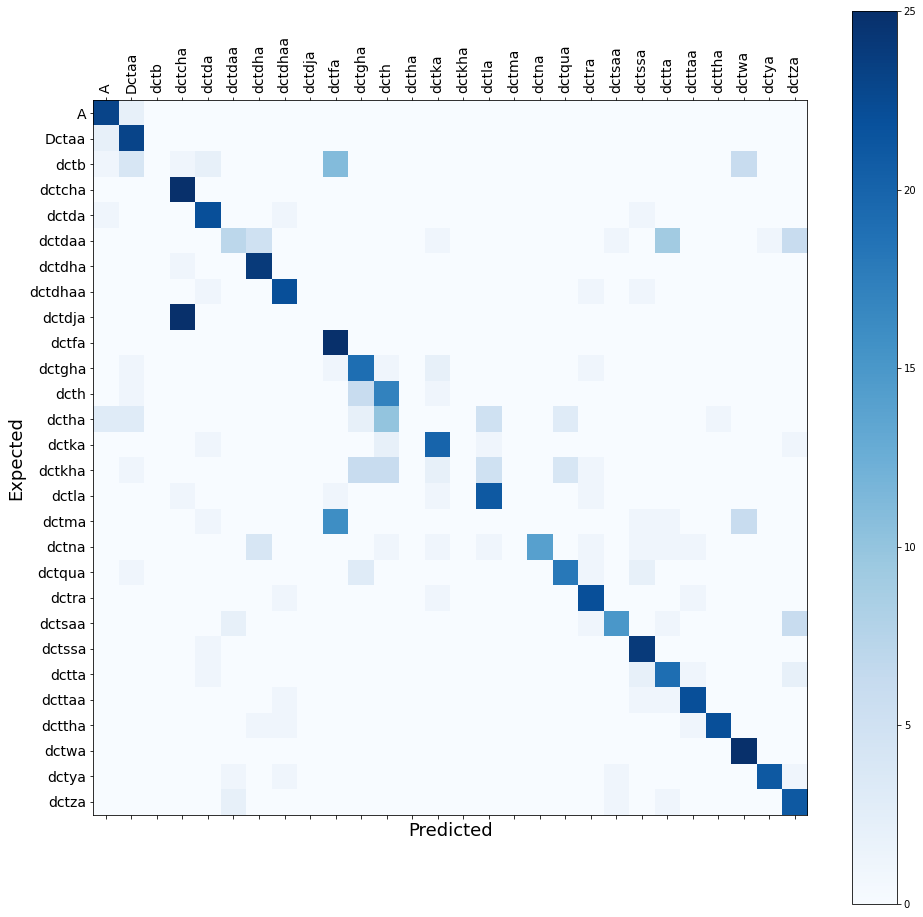

In [29]:
temp = []
for lab in y_classes:
    #print(l[lab][0], l[lab][1])
    temp.append(l[lab][0])
temp = np.array(temp)

conf_mat = confusion_matrix(y_true=test_label[0:,0], y_pred=temp)

fig = plt.figure(figsize=(16,16))
plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=fig.number)
plt.colorbar()
plt.xticks(np.arange(28), np.array(labels).astype(str), rotation=90, fontsize=14)
plt.yticks(np.arange(28), np.array(labels).astype(str), fontsize=14)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Expected', fontsize=18)
plt.show()

In [67]:
for i in range(707):
    print(temp[i], test_label[:,0][i])

dctna dctna
dcttaa dctna
dctna dctna
dctdha dctna
dctla dctna
dctdha dctna
dctna dctna
dctna dctna
dctna dctna
dcth dctna
dctna dctna
dctna dctna
dctna dctna
dctna dctna
dctna dctna
dctssa dctna
dctna dctna
dctka dctna
dctra dctna
dctna dctna
dctna dctna
dctdha dctna
dctta dctna
dctna dctna
dctdha dctna
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctka dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctcha dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctfa dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctla dctla
dctra dctla
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctsaa dctya
dctya dctya
dctdaa dctya
dctza dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctya dctya
dctdhaa dctya
dctya dctya
dctra dctra
dctra dctra
dctra dctra
dctra dctra
dctra dctra
dctra dctra
dctra dctra
dctra 

**InceptionResNetV2**

In [27]:
resnet = InceptionResNetV2(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)
resnet.trainable = False
x = Flatten()(resnet.output)
x = Dense(1000, activation="relu")(x)
x = Dropout(0.9)(x)
x = Dense(500, activation="relu")(x)
x = Dropout(0.9)(x)
x = Dense(100, activation="relu")(x)
#x = Dense(50, activation="relu")(x)
cnn_out = Dense(28, activation = "softmax")(x)
model = Model(inputs=resnet.input, outputs=cnn_out)

In [22]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
____________________________________________________________________________________________

In [28]:
# Model Compile 
adam = tensorflow.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
hist = model.fit(x_train, y_train, 
                 validation_split=0.2,
                 batch_size=64,
                 shuffle=True,
                 epochs=300)

2022-09-12 15:08:15.621358: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1018773504 exceeds 10% of free system memory.
2022-09-12 15:08:16.784184: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1018773504 exceeds 10% of free system memory.


Epoch 1/300


KeyboardInterrupt: 

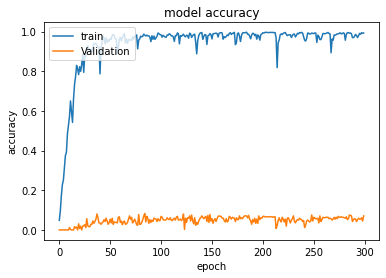

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

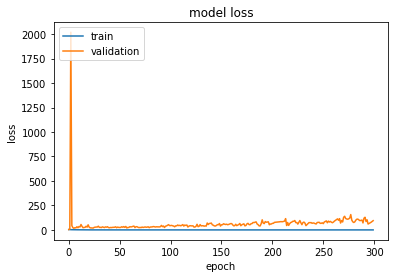

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
test = model.predict(x_test)

In [23]:
y_classes = test.argmax(axis=1)
y_classes

array([ 0,  0,  0, 20,  0, 20,  0,  0,  0,  0, 19,  0,  0,  0,  0, 14,  0,
       20,  0,  0,  0, 20, 20,  0,  0,  1, 12,  1,  1,  1,  1, 12,  1,  1,
        1,  1, 15,  1,  1,  1,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2, 22,  2,  2,
        4,  2,  2,  2, 14, 20,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,
       22,  3,  3,  3,  3, 20,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4, 20,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 14,  4,
       20, 20,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  8,
        6,  6,  6,  6,  6,  6,  6, 17,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7, 16,  7,  0,  7,  7,  7,  7, 16,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8, 22,  8,  8,  8,  8,  8, 19,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8, 22

In [24]:
from sklearn.metrics import classification_report

In [25]:
y_true = []
for i in y_test:
    n = np.where(i==1)
    y_true.append(int(n[0]))
y_true

TypeError: only size-1 arrays can be converted to Python scalars

In [25]:
gg = y_test.astype(int)==y_classes
test_set_accuracy = np.mean(gg)
test_set_accuracy

0.6591230551626591

In [30]:
labels_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
print(classification_report(y_test.astype(int), y_classes.astype(int), labels=labels_))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       1.00      0.84      0.91        25
           2       0.87      0.80      0.83        25
           3       0.88      0.88      0.88        25
           4       0.50      0.84      0.63        25
           5       1.00      1.00      1.00        25
           6       0.88      0.92      0.90        25
           7       0.50      0.88      0.64        25
           8       0.72      0.92      0.81        25
           9       0.93      0.52      0.67        25
          10       0.51      0.88      0.65        25
          11       0.83      0.80      0.82        25
          12       0.58      0.76      0.66        25
          13       0.72      0.84      0.78        25
          14       0.75      0.96      0.84        25
          15       0.86      0.76      0.81        25
          16       0.71      0.48      0.57        25
          17       0.48    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
temp = []
for lab in y_classes:
    #print(l[lab][0], l[lab][1])
    temp.append(l[lab][0])
temp = np.array(temp)

In [82]:
df = ps.DataFrame()
df['real'] = test_label[0:,0]
df['pred'] = temp
df

,real,pred
0,dctna,dctna
1,dctna,dctna
2,dctna,dctna
3,dctna,dctna
4,dctna,dctna
...,...,...
702,dctkha,dctqua
703,dctkha,dctqua
704,dctkha,dctka
705,dctkha,dctla


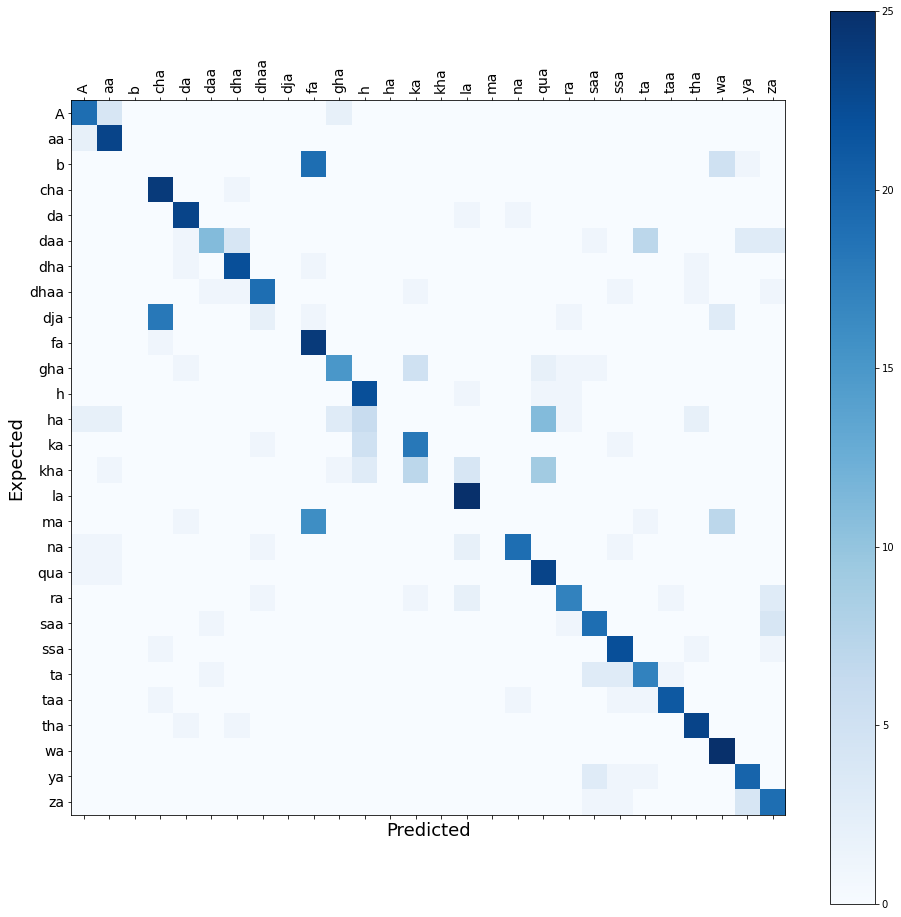

In [30]:
conf_mat = confusion_matrix(y_true=test_label[0:,0], y_pred=temp)

fig = plt.figure(figsize=(16,16))
plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=fig.number)
plt.colorbar()
plt.xticks(np.arange(28), np.array(labels).astype(str), rotation=90, fontsize=14)
plt.yticks(np.arange(28), np.array(labels).astype(str), fontsize=14)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Expected', fontsize=18)
plt.show()